In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('train.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
list(test)

['id', 'label', 'tweet']

In [6]:
train.set_index('id') #can also add inplace=True

,label,tweet
id,,
1,0,@user when a father is dysfunctional and is s...
2,0,@user @user thanks for #lyft credit i can't us...
3,0,bihday your majesty
4,0,#model i love u take with u all the time in ...
5,0,factsguide: society now #motivation
6,0,[2/2] huge fan fare and big talking before the...
7,0,@user camping tomorrow @user @user @user @use...
8,0,the next school year is the year for exams.ð...
9,0,we won!!! love the land!!! #allin #cavs #champ...


In [7]:
train['label'].iloc[5:10]

5    0
6    0
7    0
8    0
9    0
Name: label, dtype: int64

In [8]:
train['tweet'].iloc[0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [9]:
train = train.rename(columns={'tweet': 'tweets'})

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id        31962 non-null int64
label     31962 non-null int64
tweets    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [11]:
from textblob import TextBlob

In [12]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
train['tweets'] = train['tweets'].str.strip()

In [14]:
train['tweets'] = train['tweets'].str.lower()

In [15]:
train['len'] = train['tweets'].str.len()

In [16]:
train.head(10)

,id,label,tweets,len
0,1,0,@user when a father is dysfunctional and is so...,101
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,19
3,4,0,#model i love u take with u all the time in ...,84
4,5,0,factsguide: society now #motivation,38
5,6,0,[2/2] huge fan fare and big talking before the...,114
6,7,0,@user camping tomorrow @user @user @user @user...,73
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,86
9,10,0,@user @user welcome here ! i'm it's so #gr8 !,48


In [17]:
from nltk.corpus import stopwords

In [18]:
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS

In [19]:
train['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])).head()

0    @user father dysfunctional selfish drags kids ...
1    @user @user thanks #lyft credit can't use caus...
2                                       bihday majesty
3    #model love u u time urð±!!! ðððð...
4                      factsguide: society #motivation
Name: tweets, dtype: object

In [20]:
train['tweet_without_stopwords'] = train['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [21]:
train.head()

,id,label,tweets,len,tweet_without_stopwords
0,1,0,@user when a father is dysfunctional and is so...,101,@user father dysfunctional selfish drags kids ...
1,2,0,@user @user thanks for #lyft credit i can't us...,122,@user @user thanks #lyft credit can't use caus...
2,3,0,bihday your majesty,19,bihday majesty
3,4,0,#model i love u take with u all the time in ...,84,#model love u u time urð±!!! ðððð...
4,5,0,factsguide: society now #motivation,38,factsguide: society #motivation


In [22]:
train['lenx'] = train['tweet_without_stopwords'].str.len()

In [23]:
train.head()

,id,label,tweets,len,tweet_without_stopwords,lenx
0,1,0,@user when a father is dysfunctional and is so...,101,@user father dysfunctional selfish drags kids ...,63
1,2,0,@user @user thanks for #lyft credit i can't us...,122,@user @user thanks #lyft credit can't use caus...,105
2,3,0,bihday your majesty,19,bihday majesty,14
3,4,0,#model i love u take with u all the time in ...,84,#model love u u time urð±!!! ðððð...,59
4,5,0,factsguide: society now #motivation,38,factsguide: society #motivation,31


In [24]:
train['len'].mean(), train['lenx'].mean()

(83.27141605656718, 64.79050122019899)

In [25]:
train['len'].describe(), train['lenx'].describe()

(count    31962.000000
 mean        83.271416
 std         29.756064
 min          9.000000
 25%         61.000000
 50%         87.000000
 75%        106.000000
 max        273.000000
 Name: len, dtype: float64, count    31962.000000
 mean        64.790501
 std         24.695537
 min          0.000000
 25%         46.000000
 50%         66.000000
 75%         83.000000
 max        271.000000
 Name: lenx, dtype: float64)

In [26]:
print("The lenght's average in tweets: {}".format(train['lenx'].mean()))

The lenght's average in tweets: 64.79050122019899


In [27]:
import re

In [28]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [29]:
train['lenx'].mean()

64.79050122019899

In [30]:
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [31]:
# We create a column with the result of the analysis:
train['SA'] = np.array([analize_sentiment(tweet) for tweet in train['tweets']])

In [32]:
# We display the updated dataframe with the new column:
train.head()

,id,label,tweets,len,tweet_without_stopwords,lenx,SA
0,1,0,@user when a father is dysfunctional and is so...,101,@user father dysfunctional selfish drags kids ...,63,-1
1,2,0,@user @user thanks for #lyft credit i can't us...,122,@user @user thanks #lyft credit can't use caus...,105,1
2,3,0,bihday your majesty,19,bihday majesty,14,0
3,4,0,#model i love u take with u all the time in ...,84,#model love u u time urð±!!! ðððð...,59,1
4,5,0,factsguide: society now #motivation,38,factsguide: society #motivation,31,0


In [33]:
train.shape

(31962, 7)

In [34]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(train['tweet_without_stopwords']) if train['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(train['tweet_without_stopwords']) if train['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(train['tweet_without_stopwords']) if train['SA'][index] < 0]

In [35]:
type(pos_tweets)

list

In [36]:
print("The lenght's average in tweets: {}".format(len(pos_tweets)))
print("The lenght's average in tweets: {}".format(len(neu_tweets)))
print("The lenght's average in tweets: {}".format(len(neg_tweets)))

The lenght's average in tweets: 16118
The lenght's average in tweets: 11149
The lenght's average in tweets: 4695


In [37]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(train['tweet_without_stopwords'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(train['tweet_without_stopwords'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(train['tweet_without_stopwords'])))

Percentage of positive tweets: 50.42863400287842%
Percentage of neutral tweets: 34.8820474313247%
Percentage de negative tweets: 14.689318565796883%


In [38]:
Dist = [{'pos_Tweets', 'neu_tweets', 'neg_tweets'}]

In [39]:
Sorted_tweets = pd.DataFrame(
    {'pos_tweets': pos_tweets,
     'neu_tweets': pos_tweets,
     'neg_tweets': pos_tweets
    })

In [40]:
Sorted_tweets.head()

,neg_tweets,neu_tweets,pos_tweets
0,@user @user thanks #lyft credit can't use caus...,@user @user thanks #lyft credit can't use caus...,@user @user thanks #lyft credit can't use caus...
1,#model love u u time urð±!!! ðððð...,#model love u u time urð±!!! ðððð...,#model love u u time urð±!!! ðððð...
2,[2/2] huge fan fare big talking leave. chaos p...,[2/2] huge fan fare big talking leave. chaos p...,[2/2] huge fan fare big talking leave. chaos p...
3,won!!! love land!!! #allin #cavs #champions #c...,won!!! love land!!! #allin #cavs #champions #c...,won!!! love land!!! #allin #cavs #champions #c...
4,@user @user welcome ! i'm it's #gr8 !,@user @user welcome ! i'm it's #gr8 !,@user @user welcome ! i'm it's #gr8 !


In [41]:
positivePerc = len(pos_tweets)/len(train)*100
neutralPerc = len(neu_tweets)/len(train)*100
negativePerc = len(neg_tweets)/len(train)*100

In [42]:
type(positivePerc)

float

In [43]:
positivePerc, neutralPerc, negativePerc

(50.42863400287841, 34.8820474313247, 14.689318565796883)

In [44]:
percentile = pd.DataFrame([[50.42863400287841], [34.8820474313247], [14.689318565796883]], 
                      index = ['positive', 'neutral', 'negative'],
                      columns = ['percentage'])

#columns aantal moet gelijk zijn aan de number of values in eerste argument
percentile

,percentage
positive,50.428634
neutral,34.882047
negative,14.689319


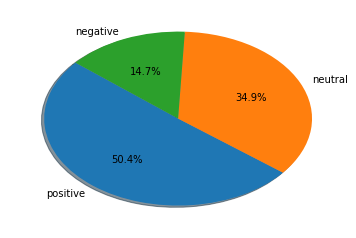

In [45]:
plt.pie(percentile, labels = ['positive', 'neutral', 'negative'],  
        autopct='%1.1f%%', pctdistance=0.6, shadow=True,startangle=140)
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

plt.show()

In [46]:
from wordcloud import WordCloud

In [47]:
CloudDF = train['tweet_without_stopwords']

In [48]:
type(CloudDF)
CloudDF = pd.DataFrame(CloudDF)

In [49]:
# CloudDF = pd.DataFrame(CloudDF)
# CloudDF = CloudDF['tweet_without_stopwords'].astype(str)

In [50]:
#alleen eerste werkt, de rest blijft in zitten. Werkt alleen met dataframe
# CloudDF = CloudDF.stack().str.replace('@user', '').unstack()
# CloudDF = CloudDF.stack().str.replace('\ð', '').unstack()
# CloudDF = CloudDF.stack().str.replace('\x9f', '').unstack()
# CloudDF = CloudDF.stack().str.replace('\x98', '').unstack()
# CloudDF = CloudDF.stack().str.replace('\x92', '').unstack()
# CloudDF = CloudDF.stack().str.replace('\x91', '').unstack()
# CloudDF = CloudDF.stack().str.replace('\x80', '').unstack()
# CloudDF = CloudDF.stack().str.replace('amp', '').unstack()

In [51]:
CloudDF = CloudDF.stack().str.replace('@user', '')
CloudDF = CloudDF.str.replace('\ð', '')
CloudDF = CloudDF.str.replace('\x9f', '')
CloudDF = CloudDF.str.replace('\x9d', '')
CloudDF = CloudDF.str.replace('\x8f', '')
CloudDF = CloudDF.str.replace('\x98', '')
CloudDF = CloudDF.str.replace('\x92', '')
CloudDF = CloudDF.str.replace('\x91', '')
CloudDF = CloudDF.str.replace('\x80', '')
CloudDF = CloudDF.str.replace('amp', '').unstack()

In [52]:
#Change or leave at/to series first 
# def remove(a):
#     return(a.replace('@user', ''))

In [53]:
# CloudDF = CloudDF.apply(remove)

In [54]:
# def remove(b):
#     return(b.replace('ð', ''))

In [55]:
# CloudDF = CloudDF.apply(remove)

In [56]:
# def remove(c):
#     return(c.replace('x9f', ''))

In [57]:
# CloudDF = CloudDF.apply(remove)

In [58]:
# def remove(d):
#     return(d.replace('x98', ''))

In [59]:
# CloudDF = CloudDF.apply(remove)

In [60]:
type(CloudDF)

pandas.core.frame.DataFrame

In [61]:
#For the purpose of changing tolist function. If already DF no need.
# CloudDF = pd.DataFrame(CloudDF)

In [62]:
CloudDF

,tweet_without_stopwords
0,father dysfunctional selfish drags kids dysfu...
1,thanks #lyft credit can't use cause don't of...
2,bihday majesty
3,#model love u u time ur±!!!  ¦¦¦
4,factsguide: society #motivation
5,[2/2] huge fan fare big talking leave. chaos p...
6,cing tomorrow dannyâ¦
7,school year year exams.¯ can't think ­ #school...
8,won!!! love land!!! #allin #cavs #chions #clev...
9,welcome ! i'm it's #gr8 !


In [63]:
# CloudDF.info()
# CloudDF

In [64]:
df_list = CloudDF['tweet_without_stopwords'].tolist()
type(df_list)

list

In [65]:
df_list

[' father dysfunctional selfish drags kids dysfunction. #run',
 "  thanks #lyft credit can't use cause don't offer wheelchair vans pdx. #disapointed #getthanked",
 'bihday majesty',
 '#model love u u time ur\x93±!!! \x99\x8e\x84 ¦¦¦',
 'factsguide: society #motivation',
 '[2/2] huge fan fare big talking leave. chaos pay disputes there. #allshowandnogo',
 ' cing tomorrow        dannyâ¦',
 "school year year exams.¯ can't think \xad #school #exams #hate #imagine #actorslife #revolutionschool #girl",
 'won!!! love land!!! #allin #cavs #chions #cleveland #clevelandcavaliers â¦',
 "  welcome ! i'm it's #gr8 !",
 'â\x86 #ireland consumer price index (mom) climbed previous 0.2% 0.5% #blog #silver #gold #forex',
 'selfish. #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking #values #love #',
 'daddy today!! #80days #gettingfed',
 " #cnn calls #michigan middle school 'build wall' chant '' #tcot",
 'comment! #australia #opkillingbay #seashepherd #helpc

In [66]:
wordcloud = WordCloud().generate(str(df_list))

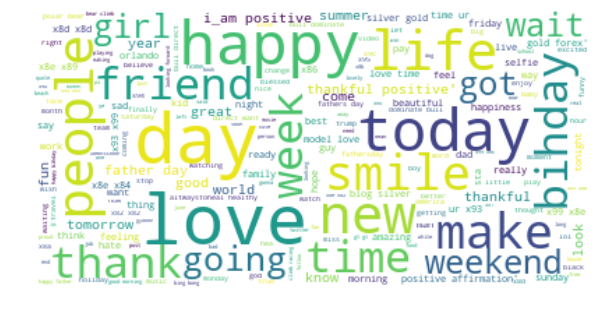

In [67]:
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=50, background_color='white').generate(str(df_list))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# WordCloud of Negative Tweets

In [68]:
Neg = Sorted_tweets['neg_tweets']

In [69]:
type(Neg)

pandas.core.series.Series

In [70]:
Neg = pd.DataFrame(Neg)

In [71]:
Neg.head()

,neg_tweets
0,@user @user thanks #lyft credit can't use caus...
1,#model love u u time urð±!!! ðððð...
2,[2/2] huge fan fare big talking leave. chaos p...
3,won!!! love land!!! #allin #cavs #champions #c...
4,@user @user welcome ! i'm it's #gr8 !


In [72]:
Neg = Neg.stack().str.replace('@user', '')
Neg = Neg.str.replace('\ð', '')
Neg = Neg.str.replace('\x9f', '')
Neg = Neg.str.replace('\x9d', '')
Neg = Neg.str.replace('\x8f', '')
Neg = Neg.str.replace('\x98', '')
Neg = Neg.str.replace('\x92', '')
Neg = Neg.str.replace('\x91', '')
Neg = Neg.str.replace('\x80', '')
Neg = Neg.str.replace('x8eð', '').unstack()

In [73]:
df_list = Neg['neg_tweets'].tolist()
type(df_list)

list

In [74]:
wordcloud = WordCloud().generate(str(df_list))

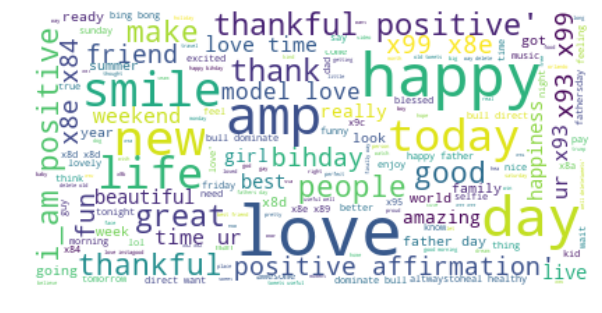

In [75]:
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=50, background_color='white').generate(str(df_list))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()